50cm의 농어 데이터를 근접 회귀 알고리즘에 넣으면 실제의 무게보다 적게 나온다 이는 근접 회귀 알고리즘의 한계때문이다.

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

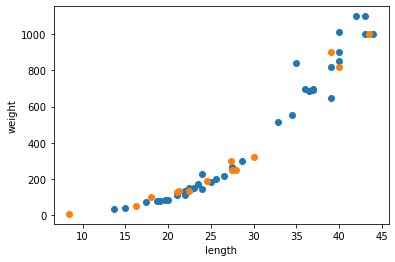

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input,train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#사이킷런 모델은 2차원 배열 형태여야 함.
#-1:모든 원소, 전체 개수를 몰라도 됨
train_input = train_input.reshape(-1,1) 
test_input = test_input.reshape(-1,1)

import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
#결과: [1241.83860323]

[1241.83860323]


[39.01714496] -709.0186449535477


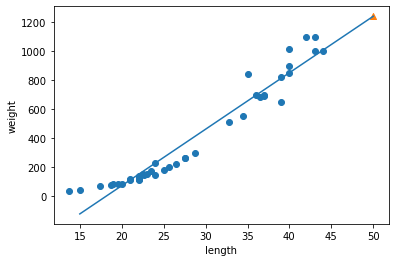

In [11]:
# 기울기, 절편
print(lr.coef_,lr.intercept_)



#y = lr.coef_*x + lr.intercept_
#15~50까지 1차 방정식 그래프를 그린다. 
#-> (15,[lr.coef_*15 + lr.intercept_])점과 (50,[lr.coef_*50 + lr.intercept_])점을 잇기
plt.plot([15,50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])
plt.scatter(train_input, train_target)
plt.scatter(50,1241.8, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [12]:
#결정 계수 평가

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 0.9398463339976039
# 0.8247503123313558

0.939846333997604
0.8247503123313558


단순히 둘 차이만 보면 훈련세트에 과대적합 되었다고 볼 수 있지만, 사실 둘 다 점수가 낮아 과소적합이다. 이 문제점은 그래프 좌하단에서 찾을 수 있다. 농어 무게의 산점도를 보면 사실 직선이라기 보다는 곡선이다. 따라서, 2차 방정식이 더 예측에 적합하다.

In [16]:
#다항회귀 Polynomial Regression

# y = ax^2 + x + b
#기존 열에 제곱 열 추가
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

lr.fit(train_poly, train_target)

#50cm 농어 에측이 제곱한 값을 첫번째 열로 추가(위에서 넣기 때문에 식이 같아야 함)
lr.predict([[50**2,50]])
#결과: array([1573.98423528])

array([1573.98423528])

In [17]:
print(lr.coef_,lr.intercept_)
#[  1.01433211 -21.55792498] 116.05021078278276

[  1.01433211 -21.55792498] 116.05021078278259


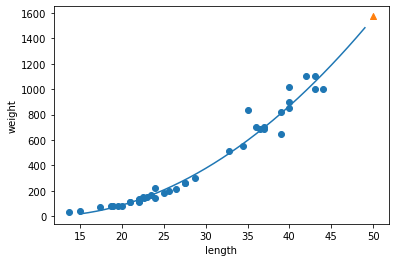

0.9706807451768623
0.9775935108325121


In [18]:
#산점도와 모델 평가

# 15~50까지 매우 짧은 직선을 1씩 끊어서 그려 곡선을 표현
point = np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point, 1.01*point**2-21.6*point + 116.05)

plt.scatter(50,1573, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#결과:0.9706807451768623
#결과:0.9775935108325122